In [2]:
conda install -c anaconda quandl

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\abe_irlbeck\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - quandl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           5 KB  anaconda
    anaconda-custom            |           py37_1           3 KB
    ca-certificates-2019.10.16 |                0         163 KB  anaconda
    certifi-2019.9.11          |           py37_0         155 KB  anaconda
    openssl-1.1.1              |       he774522_0         5.7 MB  anaconda
    tbb-2019.4                 |       h74a9793_0         173 KB  anaconda
    ------

In [105]:
import quandl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [106]:
quandl.ApiConfig.api_key = "zSe_bKsyRtCbBxWJ5HZ9"

In [131]:
StartDate = "2019-11-16"
EndDate = "2019-11-20"

live_data = quandl.get("CHRIS/CME_LC1", start_date = StartDate, 
                  end_date = EndDate)
feeder_data = quandl.get("CHRIS/CME_FC1", start_date = StartDate, 
                  end_date = EndDate)
corn_data = quandl.get("CHRIS/CME_C1", start_date = StartDate, 
                  end_date = EndDate)

#pulled from https://blog.quandl.com/api-for-commodity-data
#Corn = CHRIS/CME_C1
#Feeder Cattle = CHRIS/CME_FC1
live_data.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-11-18,119.100,119.150,118.50,118.75,0.400,118.700,17591.0,68170.0
2019-11-19,118.675,118.900,117.70,118.75,0.075,118.775,17777.0,63091.0
2019-11-20,118.550,119.525,118.15,119.35,0.525,119.300,16101.0,58764.0


In [132]:
live_data = live_data.reset_index()

feeder_data = feeder_data.reset_index()

corn_data = corn_data.reset_index()

corn_data.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2019-11-18,371.00,371.75,367.50,368.00,3.50,367.75,182872.0,481164.0
1,2019-11-19,367.75,373.00,367.75,369.75,2.25,370.00,185640.0,446608.0
2,2019-11-20,369.75,370.50,365.75,367.00,3.25,366.75,274150.0,429707.0


In [129]:
live_last = live_data.iloc[0:,4]
live_opn = live_data.iloc[0:,1]
live_high = live_data.iloc[0:,2]
live_low = live_data.iloc[0:,3]
live_time = live_data.iloc[0:,0]

feeder_last = feeder_data.iloc[0:,4]
feeder_opn = feeder_data.iloc[0:,1]
feeder_high = feeder_data.iloc[0:,2]
feeder_low = feeder_data.iloc[0:,3]
feeder_time = feeder_data.iloc[0:,0] 

corn_last = corn_data.iloc[0:,4]
corn_opn = corn_data.iloc[0:,1]
corn_high = corn_data.iloc[0:,2]
corn_low = corn_data.iloc[0:,3]
corn_time = corn_data.iloc[0:,0] 

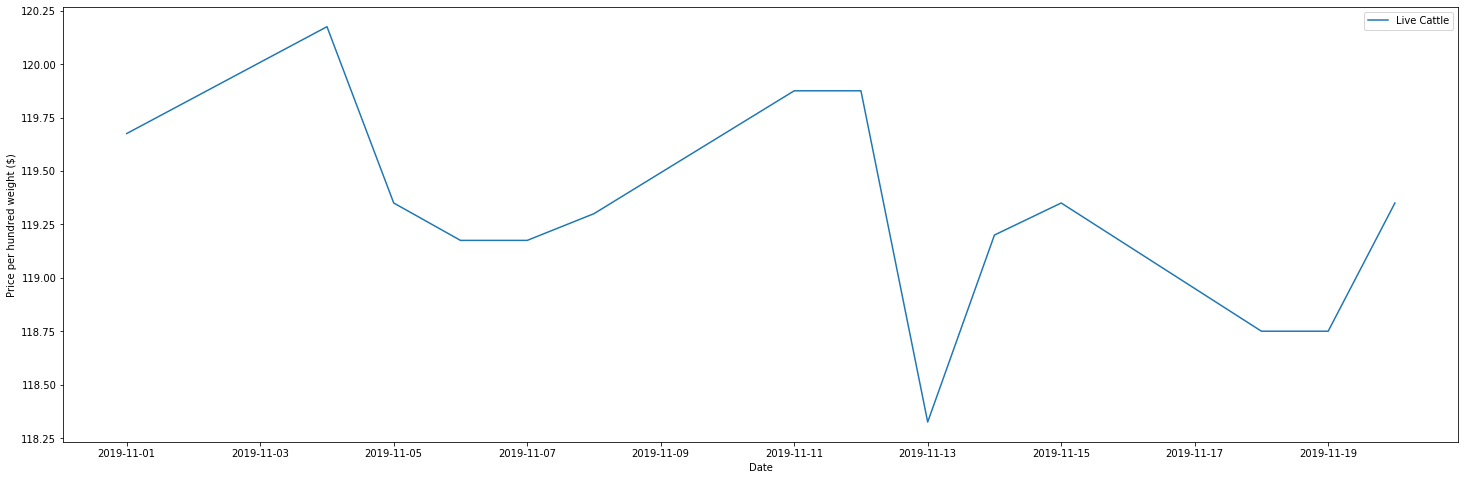

In [130]:
plt.figure(figsize=(25,8))
plt.xlabel("Date")
plt.ylabel("Price per hundred weight ($)")
plt.plot(live_time,live_last, label='Live Cattle')
#plt.plot(feeder_time,feeder_last, label = 'Feeder Cattle')

plt.legend()
plt.show()



#plt.plot(x,opn)
#plt.plot(x,high)
#plt.plot(x,low)


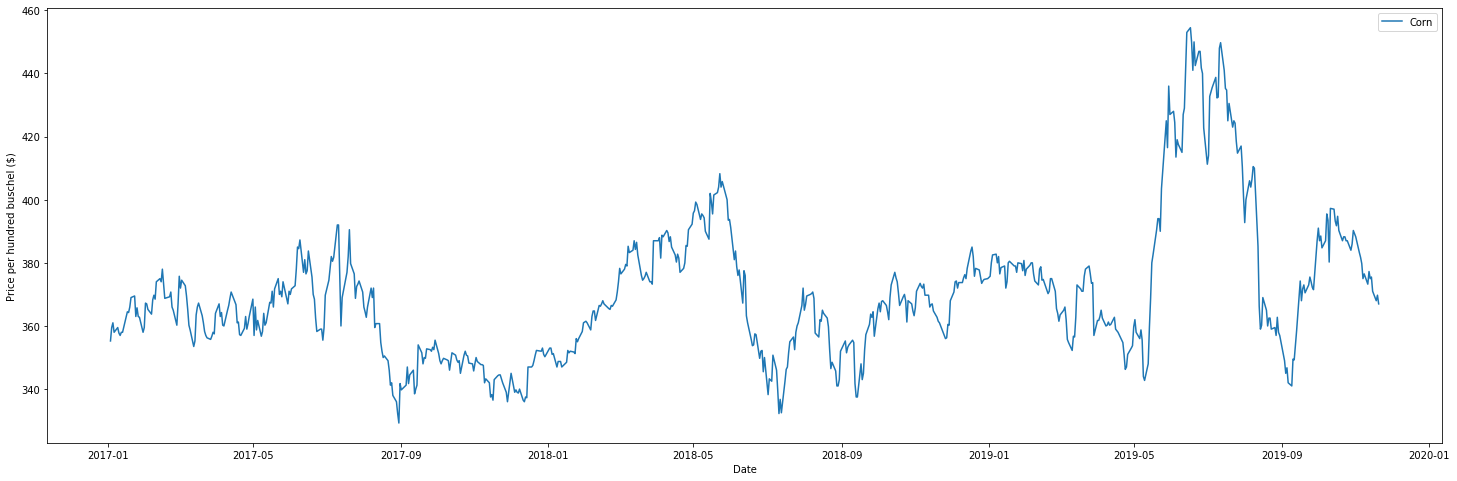

In [117]:
plt.figure(figsize=(25,8))
plt.xlabel("Date")
plt.ylabel("Price per hundred buschel ($)")
plt.plot(corn_time,corn_last, label = 'Corn')
plt.legend()
plt.show()